
# **Israel Elections 2020-2021 Comparison**
##Oded Mousai 




<div dir="rtl">

בעבודה זו ננסה למצוא הבדלים בין מערכות הבחירות מרץ 2020 ו-מרץ 202 בישראל בעזרת שימוש בכלים להורדת מימד.

</div>

## **Imports**

In [1]:
from google.colab import files
import numpy as np  
import pandas as pd  
import io
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots


## **Load data**

<div dir="rtl">

הדאטה כולל 2 טבלאות שמכילות את נתוני ההצבעות למפלגות השונות לפי ישובים. 

הטבלאות נלקחו 
[מאתר ועדת הבחירות המרכזית
](https://votes23.bechirot.gov.il/).



</div>

In [2]:
url = "https://raw.githubusercontent.com/OdedMous/ElectionsDataAnalysis/main/data/votes%20per%20city%202020.csv"
df_cities_2020 = pd.read_csv(url, encoding = 'iso-8859-8', index_col='שם ישוב')

df_cities_2020

,סמל ועדה,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ג,ודעם,ז,זך,זץ,טב,י,יז,ינ,יף,יק,יר,כ,כן,ל,מחל,נ,נז,ני,נץ,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס,Unnamed: 37
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבו גווייעד שבט,18,967,2018,595,6,589,13,0,554,0,0,0,0,0,1,0,0,0,0,0,1,1,4,0,1,0,0,0,8,2,0,0,0,0,2,2,NaN
אבו גוש,2,472,4821,2718,36,2682,75,4,2157,0,0,0,5,0,0,5,1,0,1,0,0,5,280,0,0,0,3,2,123,0,2,0,0,1,4,14,NaN
אבו סנאן,6,473,9422,6090,53,6037,92,6,4458,0,1,0,16,1,2,13,2,0,1,1,2,230,190,3,2,1,3,3,752,0,2,2,1,2,4,247,NaN
אבו עבדון שבט,18,958,142,41,1,40,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
אבו קורינאת שבט,18,968,3037,1336,8,1328,9,0,1263,0,0,0,1,0,0,3,0,0,1,0,0,0,8,0,1,2,1,0,33,0,2,1,0,2,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
תקומה,18,665,488,416,2,414,5,5,0,0,0,0,163,0,0,0,0,0,0,0,0,1,161,1,0,0,2,1,63,0,0,0,0,0,0,12,NaN
תקוע,2,3563,2158,1619,4,1615,28,33,3,7,0,0,760,0,0,0,0,0,0,5,1,35,583,2,0,0,29,0,85,2,0,1,0,2,5,34,NaN
תראבין אצאנע שבט,18,970,520,48,0,48,0,0,43,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,NaN


In [3]:
url = "https://raw.githubusercontent.com/OdedMous/ElectionsDataAnalysis/main/data/votes%20per%20city%202021.csv"
df_cities_2021 = pd.read_csv(url, encoding = 'iso-8859-8', index_col='שם ישוב')

df_cities_2021

,סמל ועדה,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ב,ג,ודעם,ז,זץ,ט,י,יז,ינ,יף,יק,יר,כ,כך,כן,ל,מחל,מרצ,נ,ני,נר,עם,פה,ףז,צי,צכ,צף,ץ,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,ת,Unnamed: 46
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבירים,6,1220,221,151,1,150,47,0,0,3,0,0,2,0,3,0,0,0,0,0,0,16,2,5,31,0,0,0,0,27,0,0,0,0,0,0,0,0,0,5,0,0,0,1,8,NaN
אדירים,5,113,234,180,0,180,1,7,4,0,0,0,9,0,1,0,0,0,0,0,0,3,0,84,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,61,6,NaN
אושה,8,278,382,276,0,276,72,7,0,3,0,0,0,0,2,0,0,1,0,0,0,37,8,24,20,0,0,0,0,86,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15,NaN
אחווה,17,1157,183,145,0,145,14,4,0,0,0,0,4,0,0,0,0,0,0,0,0,36,3,27,10,0,0,0,0,37,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8,NaN
איבים,17,338,138,40,0,40,0,4,0,0,0,1,10,0,0,0,0,0,0,0,0,5,0,17,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
קורנית,6,1179,640,491,0,491,89,18,0,1,0,0,3,0,1,0,0,0,0,0,0,73,10,32,98,0,0,0,0,150,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15,NaN
שורשים,6,1235,423,290,0,290,60,19,0,3,0,1,1,0,1,0,0,0,0,0,0,38,7,32,21,0,0,0,0,81,0,0,0,0,0,0,0,0,0,1,0,0,0,0,25,NaN
שכניה,6,1160,617,445,0,445,101,17,0,3,0,0,4,0,4,0,0,0,0,0,0,61,12,14,68,0,0,0,0,121,0,0,0,0,0,0,0,0,0,3,0,0,0,1,36,NaN


In [4]:
parties_dict_2020 ={'אמת' : "עבודה גשר מרצ", 'ג' : "יהדות התורה", 'ודעם'  : "הרשימה המשותפת", 'טב'  : "ימינה", 'נץ'  : "עוצמה יהודית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "כחול לבן", 'שס'  : "שס"}

parties_dict_2021 ={'אמת' : "עבודה", 'ג' : "יהדות התורה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה", 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",
                    'כן'  : "כחול לבן", 'שס'  : "שס", "פה": "יש עתיד", "ט": "הציונות הדתית", "ת":"תקווה חדשה", "מרצ":"מרצ", "עם": "רעם"}

## **Pre-processing**

<div dir="rtl">

נאחד את טבלאות ההצבעות של שתי מערכות הבחירות ע"י שרשור של שני הטבלאות לטבלה אחת בצורה אנכית (כלומר לפי המפלגות). 

כדי להתמודד עם השינויים בשמות והרכבי המפלגות בין שתי מערכות הבחירות נבצע את הדברים הבאים: עבור 2020 ניקח רק את 8 המפלגות הגדולות שעברו את אחוז החסימה: הליכוד, כחול לבן, שס, יהדות התורה, ימינה, עבודה-גשר-מרצ וישראל ביתינו. כעת עבור 2021 ניקח את אותן המפלגות, אך נוסיף למפלגות הרלוונטיות את ההצבעות של מפלגות שהתפצלו מהן במערכת הבחירות של 2021; כך למשל למפלגת כחול לבן נוסיף את ההצבעות של מפלגת יש עתיד, ולמפלגת ימינה נוסיף את ההצבעות של מפלגת הציונות הדתית. בטבלה הבאה ניתן לראות את כל השינויים:


</div>

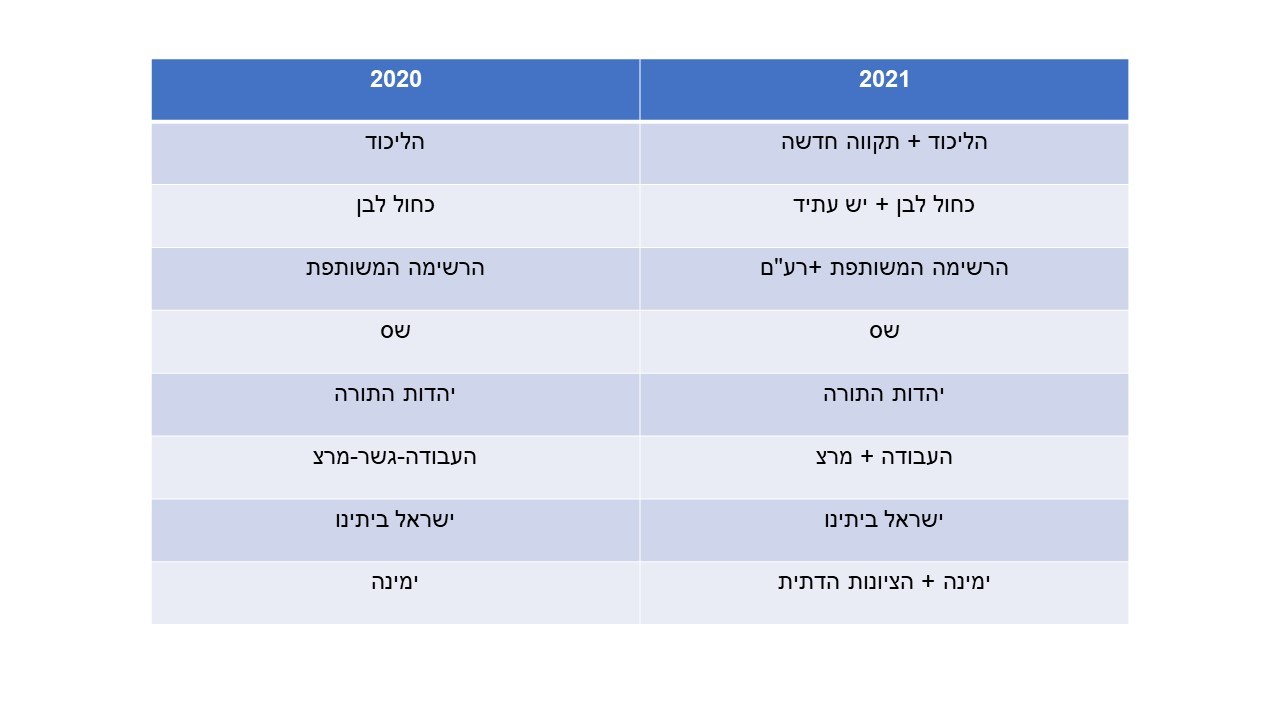

In [5]:
df_cities_2020_big = df_cities_2020[["טב","ל", "מחל","שס", "ג", "פה","אמת", "ודעם"]]
df_cities_2020_big["טב"] += df_cities_2020["נץ"]
df_cities_2020_big = df_cities_2020_big.rename(columns={'טב': 'ב', 'פה': 'כן'})


df_cities_2021_big = df_cities_2021[["ב","ל", "מחל","שס", "ג", "כן","אמת", "ודעם"]]
df_cities_2021_big["ב"] += df_cities_2021["ט"]
df_cities_2021_big["מחל"] += df_cities_2021["ת"]
df_cities_2021_big["כן"] += df_cities_2021["פה"]
df_cities_2021_big["אמת"] += df_cities_2021["מרצ"]
df_cities_2021_big["ודעם"] += df_cities_2021["עם"]


df_union = df_cities_2021_big.append(df_cities_2020_big)
df_union = df_union.div(df_union.sum(axis=1), axis=0) # normilize each row
df_union



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,ב,ל,מחל,שס,ג,כן,אמת,ודעם
שם ישוב,,,,,,,,
אבירים,0.014085,0.014085,0.091549,0.007042,0.000000,0.302817,0.549296,0.021127
אדירים,0.090395,0.000000,0.508475,0.344633,0.022599,0.028249,0.005650,0.000000
אושה,0.025735,0.029412,0.143382,0.000000,0.000000,0.452206,0.338235,0.011029
אחווה,0.055172,0.020690,0.241379,0.013793,0.000000,0.503448,0.165517,0.000000
איבים,0.378378,0.000000,0.459459,0.027027,0.000000,0.135135,0.000000,0.000000
...,...,...,...,...,...,...,...,...
תקומה,0.400485,0.002427,0.390777,0.029126,0.012136,0.152913,0.012136,0.000000
תקוע,0.496226,0.022013,0.366667,0.021384,0.020755,0.053459,0.017610,0.001887
תראבין אצאנע שבט,0.000000,0.000000,0.000000,0.000000,0.000000,0.085106,0.000000,0.914894


<div dir="rtl">

נשים לב ששתי מערכות הבחירות התרחשו בהפרש של שנה בלבד זו מזו, ולכן יש סיכוי טוב שרשימת הישובים נשארה כמו שהיא כך שעבור כל ישוב נקבל 2 שורות בטבלה המאוחדת.

</div>

## **Dimensionality Reduction (PCA)**

<div dir="rtl">

ננרמל את הטבלה המאוחדת ונבצע הורדת מימד ל-2 מימדים באמצעות PCA כאשר מתייחסים לישובים כדגימות ולמפלגות כפיצ'רים. 

</div>



In [6]:
def do_pca(data_table, n_components):
  """
  Note: data_table.shape = (samples_num, features_num)
  """
  pca = PCA(n_components=n_components) 
  X_pca = pca.fit_transform(data_table) 

  return X_pca


def show_space(X_pca, name_features, title, name_col=None):
  temp_df = px.data.tips()

  temp_df = pd.DataFrame(X_pca).rename(columns={0:"COMP1", 1:"COMP2"})
  temp_df[name_col] = name_features
  y_2021 = np.array(['2021'] * df_cities_2021.shape[0])
  y_2020 = np.array(['2020'] * df_cities_2020.shape[0])
  temp_df['year'] = np.concatenate((y_2020, y_2021), axis=0)

  if name_col:
    fig = px.scatter(temp_df, x="COMP1", y="COMP2",color='year',template="plotly_dark", text=name_col)
  else:
    fig = px.scatter(temp_df, x="COMP1", y="COMP2", color='year', template="plotly_dark")
  fig.update_traces(textposition='top center')
  fig.update_layout(title_text=title, title_x=0.5)


  fig.show()



In [26]:
pca_alg = PCA(n_components=2) 
X_pca = pca_alg.fit_transform(df_union) 

show_space(X_pca, name_features=df_union.index, title="PCA Space") 

<div dir="rtl">

כל נקודה במרחב מייצגת ישוב מסוים, והישובים נצבעו לפי מערכת הבחירות.

</div>

**Analyze the space**

<div dir="rtl">

כדי להבין את המרחב שהתקבל, נסתכל ראשית על שמות הישובים:  
</div>

In [8]:
show_space(X_pca, name_features=df_union.index, title="PCA Space", name_col="city")

<div dir="rtl">

מסקירה שטחית ניתן לראות שגוש הישובים שנמצא למטה מימין מכיל הרבה ישובים שמשויכים למגזר הערבי, והגוש השמאלי הארוך מכיל הרבה ישובים שמשויכים למגזר היהודי.

</div>

**PCA Explained Varience**

Total explained variance: 73 %


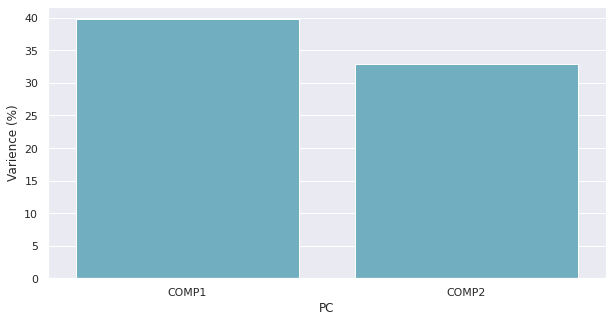

In [28]:
print("Total explained variance:", round(sum(pca_alg.explained_variance_ratio_)*100), "%")

df = pd.DataFrame({'Varience (%)':pca_alg.explained_variance_ratio_*100, 'PC':['COMP1','COMP2']})
sn.set(rc={'figure.figsize':(10,5)})
sn.barplot(x='PC',y="Varience (%)", data=df, color="c");

<div dir="rtl">

אפשר לראות שכ-73% מהשונות בדאטה מוסברת ע"י שני הרכיבים הראשיים המובילים.

</div>

**Effect of the features on each component**

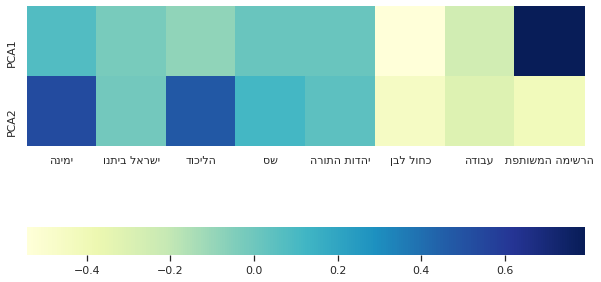

In [34]:
ax = sn.heatmap(pca_alg.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca_alg.n_components_+1)],
                 xticklabels=list(parties_dict_2021[party][::-1] for party in df_union.columns),
                 cbar_kws={"orientation": "horizontal"})
sn.set(rc={'figure.figsize':(10,10)})
ax.set_aspect("equal")

<div dir="rtl">

ניתן לראות שבמרכיב הראשי הראשון הרשימה המשותפת משפיעה באופן חזק.

</div>

<div dir="rtl">

**צביעת המרחב לפי אחוזי ההצבעה לכל מפלגה:**

</div>

In [9]:
def show_space_by_party(X_pca, df):
    fig = make_subplots(rows=2, cols=4, subplot_titles=("ימינה+הציונות הדתית", "ישראל ביתנו", "הליכוד", "שס", "יהדות התורה", "כחול לבן+יש עתיד", "עבודה+מרץ", "הרשימה המשותפת+רעם"))
    col_index = 0
    row_index = 1

    temp_df = px.data.tips()
    temp_df = pd.DataFrame(X_pca).rename(columns={0:"COMP1", 1:"COMP2"})

    for party in  "ב ל מחל שס ג כן אמת ודעם".split():
    
      if col_index == 0:
        legend_display = True
      else:
        legend_display = False

      temp_df["color"] = list(df[party])
      fig.add_trace(go.Scatter(x=temp_df["COMP1"], y=temp_df["COMP2"],mode='markers', name='', marker_color=temp_df["color"], showlegend=False, legendgroup='group1'), row=row_index, col=(col_index%4)+1)
  
      if col_index == 3:
        row_index = 2
      col_index+=1

    fig.update_layout(template='plotly_dark', showlegend=True)
    fig.show()


In [10]:
show_space_by_party(X_pca, df_union)

<div dir="rtl">

ככל שהצבע של נקודה יותר "חם" כך התמיכה של הישוב במפלגה עולה. ניתן לראות למשל שבגוש הישובים שזיהינו ששייכים למגזר הערבי התמיכה במפלגות הרשימה המשותפת ורע"ם אכן גבוהה. בנוסף אפשר לראות שבגוש השמאלי הארוך של הישובים יש ביטוי לנטייה פוליטית – בקצה העליון יש תמיכה במפלגות ימניות וככל שיורדים יש יותר תמיכה במפלגות מרכז/שמאל.

</div>

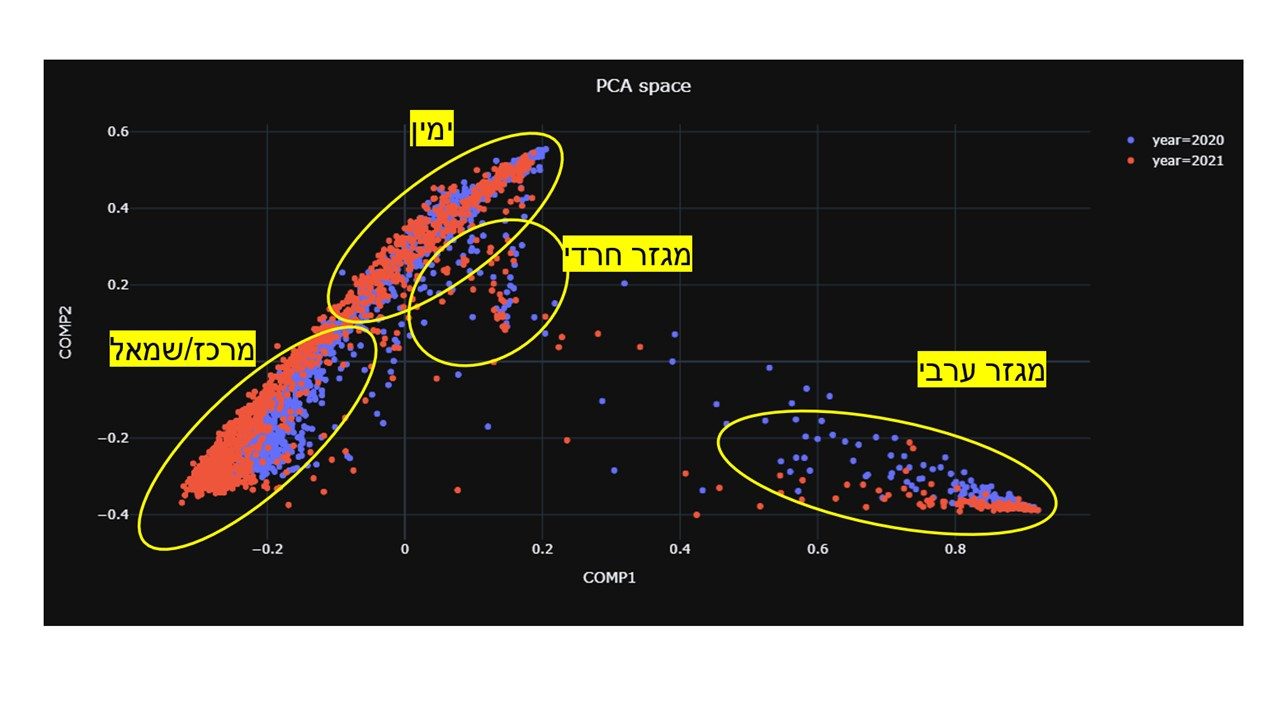


<div dir="rtl">

**מגמות בדפוסי הצבעה**

כעת נצייר חץ מכל ישוב בבחירות 2020 לאותו ישוב בבחירות 2021. נבצע זאת רק לישובים "מספיק גדולים" שמספר הבוחרים בהם גדול מ-10,000. בנוסף נציג את המרחב כך שגודל כל נקודה פרופורציונאלי לגודל הישוב שהיא מייצגת. 

</div>



In [11]:
def show_space2(X_pca, name_features,heads, tails, title, name_col=None):
  temp_df = px.data.tips()

  temp_df = pd.DataFrame(X_pca).rename(columns={0:"COMP1", 1:"COMP2"})
  temp_df[name_col] = name_features # for name for each point
  y_2021 = np.array(['2021'] * df_cities_2021.shape[0])
  y_2020 = np.array(['2020'] * df_cities_2020.shape[0])
  temp_df['year'] = np.concatenate((y_2021, y_2020), axis=0) # for the color of each point
  temp_df['בזב'] = np.array(df_cities_2021['בזב'].append(df_cities_2020['בזב'])) # for the size of each point

  if name_col:
    fig = px.scatter(temp_df, x="COMP1", y="COMP2",color='year',size='בזב', template="plotly_dark",text=name_col)
  else:
    fig = px.scatter(temp_df, x="COMP1", y="COMP2", color='year', size='בזב', template="plotly_dark")
  fig.update_traces(textposition='top center')
  fig.update_layout(title_text=title, title_x=0.5)

  # add arrows
  for key in tails:
    fig.add_annotation(
    x=heads[key][0],  # arrows' head
    y=heads[key][1],  # arrows' head
    ax=tails[key][0],  # arrows' tail
    ay=tails[key][1],  # arrows' tail
    xref='x',yref='y',axref='x',ayref='y',
    text='',  # add text to arrow
    showarrow=True,arrowhead=3,arrowsize=2,arrowwidth=1,
    arrowcolor='yellow'
    )

  fig.show()

def create_arrows_points(X):
  """
  Returns two dictionaries - one for arrows head points, and the other for 
  arrows tail points.
  The form of the dict: heads['ירושלים'] = (COMP1, COMP2)
  """
  n = df_cities_2021.shape[0]
  X_2021 = X[0:n]
  X_2020 = X[n:]

  tails = {}
  names = []

  i = 0
  for index, row in df_cities_2020.iterrows():
    if row['בזב'] > 10000:
        if  index in df_cities_2021.index:
          tails[index] = X_2020[i]
          names.append(index)
    i+=1

  heads = {}
  names = set(names)

  i=0
  for index, row in df_cities_2021.iterrows():
    if index in names:
      heads[index] = X_2021[i]
    i+=1
  return heads, tails

In [12]:
heads, tails = create_arrows_points(X_pca)
show_space2(X_pca, name_features=df_union.index, heads=heads, tails=tails, title="PCA Space")



<div dir="rtl">

ראשית ניתן לראות שבאופן כללי ישובים גדולים זזו מעט לעומת ישובים קטנים, כלומר דפוסי ההצבעה בהם לא השתנו באופן דרמטי.
שנית, אפשר לראות שבגוש השמאלי של הישובים רוב החיצים פונים כלפי מעלה ושבגוש הימני רוב החצים פונים שמאלה, וזה עשוי להעיד על כך שהתמיכה במפלגות הימניות בבחירות 2021 גדלה מבחירות 2020 .


</div>


In [13]:
# show_space2(X_pca, name_features=df_union.index, heads=heads, tails=tails, name_col="city")



<div dir="rtl">

**שלושת הישובים שזזו הכי הרבה (ללא תלות בגודל הישוב):**

</div>

In [14]:
n = df_cities_2021.shape[0]
X_pca_2021 = X_pca[0:n]
X_pca_2020 = X_pca[n:]

points_2020 = {}
points_2021 = {}

for i, city in enumerate(df_cities_2020.index):
  points_2020[city] = X_pca_2020[i]

for i, city in enumerate(df_cities_2021.index):
  points_2021[city] = X_pca_2021[i]

distances = {}
for city in df_cities_2020.index:
  if city in df_cities_2021.index:
    p1 = points_2021[city]
    p2 = points_2020[city]
    distances[city] = np.square((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

# sort in descending order (by value)
distances  = sorted(distances.items(), key=lambda x: x[1], reverse=True)

print(distances)

[('תראבין אצאנעישוב', 0.11835574334664628), ('ניין', 0.05682166403281216), ('ראס עלי', 0.026011833059600323), ('סייד שבט', 0.02180637874050097), ('שער מנשה', 0.020306839604196894), ('מסעדה', 0.01945495391086953), ('עראמשה', 0.017402389979105124), ('אל סייד', 0.009219701636339117), ('מחנה יוכבד', 0.008668603364336504), ('סאגור', 0.00782570698040205), ('טייבה בעמק', 0.006354159044706282), ('כפר מצר', 0.005838962524719456), ('נווה', 0.005830586246674826), ('מגדל שמס', 0.005523423277712001), ('דאלית אלכרמל', 0.005173857856627285), ('דחי', 0.005084053080118835), ('ראס אלעין', 0.0049108155369830386), ('גולס', 0.004122516976062995), ('עין אלאסד', 0.004045572342784283), ('טובאזנגריה', 0.0034591449810503845), ('זרזיר', 0.0030469459802540877), ('ערב אל נעים', 0.0030127550873884417), ('חמאם', 0.002848218770275404), ('תראבין אצאנע שבט', 0.0027358967137667374), ('עין נקובא', 0.002703223146380274), ('בסמת טבעון', 0.002662344443758509), ('נאעורה', 0.002307514799939959), ('מחנה הילה', 0.00222089449805

In [15]:

top_3 = distances[0:3]

heads = {}
tails = {}

for i in range(len(top_3)):
  city_name = top_3[i][0]
  for k in range(len(df_cities_2020.index)):
    if df_cities_2020.index[k] == city_name:
      idx_2020 = k
      break
  for k in range(len(df_cities_2021.index)):
    if df_cities_2021.index[k] == city_name:
      idx_2021 = k
      break
  
  tails[city_name] = X_pca_2020[idx_2020]
  heads[city_name] = X_pca_2021[idx_2021]


In [16]:
def show_space3(X_pca, name_features,heads, tails, top_3_names,title, name_col=None):
  temp_df = px.data.tips()

  temp_df = pd.DataFrame(X_pca).rename(columns={0:"COMP1", 1:"COMP2"})
  temp_df[name_col] = name_features # for name for each point
  y_2021 = np.array(['2021'] * df_cities_2021.shape[0])
  y_2020 = np.array(['2020'] * df_cities_2020.shape[0])
  temp_df['year'] = np.concatenate((y_2021, y_2020), axis=0) # for the color of each point
  temp_df['בזב'] = np.array(df_cities_2021['בזב'].append(df_cities_2020['בזב'])) # for the size of each point

  if name_col:
    fig = px.scatter(temp_df, x="COMP1", y="COMP2",color='year',size='בזב', template="plotly_dark",text=name_col)
  else:
    fig = px.scatter(temp_df, x="COMP1", y="COMP2", color='year', size='בזב', template="plotly_dark")
  fig.update_traces(textposition='top center')
  fig.update_layout(title_text=title, title_x=0.5)

  # add arrows
  for i, key in enumerate(tails):
    fig.add_annotation(
    x=heads[key][0],  # arrows' head
    y=heads[key][1],  # arrows' head
    ax=tails[key][0],  # arrows' tail
    ay=tails[key][1],  # arrows' tail
    xref='x',yref='y',axref='x',ayref='y',
    text=top_3_names[i],  # add text to arrow
    showarrow=True,arrowhead=3,arrowsize=2,arrowwidth=1,
    arrowcolor='yellow'
    )

  fig.show()



<div dir="rtl">

הצגה של שלושת הישובים במרחב ה-PCA:

</div>

In [17]:
top_3_names = [top_3[i][0] for i in range(len(top_3))]
show_space3(X_pca, name_features=df_union.index, heads=heads, tails=tails, top_3_names=top_3_names, title="PCA Space")

<div dir="rtl">

הישובים ראס עלי, וניין שייכים למגזר הערבי והישוב תראבין א-צאנע שייך למגזר הבדואי. על פי התרשים נראה כי בישובים אלו גברה התמיכה במפלגות ימניות על חשבון המפלגות הרשימה המשותפת ורע"ם. ואכן אפשר לראות זאת בבירור בתרשימים הבאים שמציגים את אחוזי ההצבעה בישובים אלה:
</div>

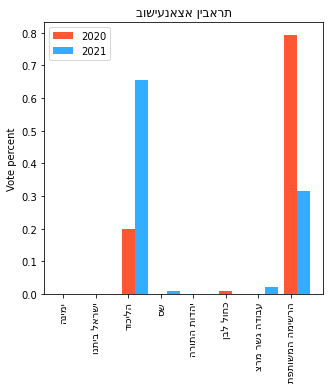

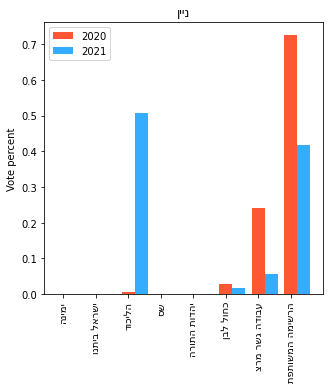

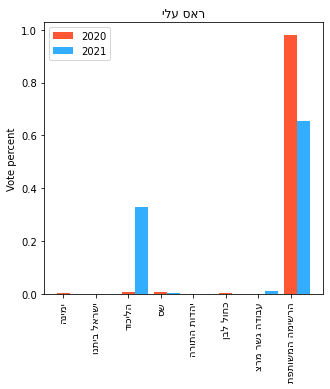

In [18]:
def bar_plot(city_name):
  parties_dict_2020 ={'אמת' : "עבודה גשר מרצ", 'ג' : "יהדות התורה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה", 'נץ'  : "עוצמה יהודית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'כן'  : "כחול לבן", 'שס'  : "שס"}
  names = df_cities_2020_big.columns
  names = [parties_dict_2020[name][::-1] for name in names]
  fig, ax = plt.subplots(figsize=(5,5))  
  width=0.4
  votes_2020 = ax.bar(np.arange(8),df_cities_2020_big.loc[city_name]/df_cities_2020_big.loc[city_name].sum(),width, color='#FF5733')
  votes_2021 = ax.bar(np.arange(8)+width, df_cities_2021_big.loc[city_name]/df_cities_2021_big.loc[city_name].sum(), width, color='#33ADFF')


  ax.set_ylabel('Vote percent')
  ax.set_title(city_name[::-1])
  ax.set_xticks(np.arange(8))
  ax.set_xticklabels(names, rotation=90)
  plt.legend([votes_2020[0], votes_2021[0]], ["2020", "2021"])
  plt.show()


for city_name in top_3_names:
  bar_plot(city_name)



<div dir="rtl">

מעניין להבין מדוע חל שינוי דרמטי בדפוסי ההצבעה בישובים אלה. סיבה אפשרית היא שקמפיין "החיבוק" של הליכוד הצליח להשפיע על בוחרים (ראו [כאן](https://ch10.co.il/news/662464/#.YKavLahvZPZ) למשל).

</div>

## **Dimensionality Reduction (TSNE)**


<div dir="rtl">

אפשר לנסות שיטות להורדת מימד אחרות ובפרט שיטות לא לינאריות (manifold learning) כגון T-SNE, LLE וכו'. כל שיטה עשויה לחשוף צדדים אחרים של הדאטה ועשויה לספק תובנות חדשות. שימוש בTSNE- למשל מוביל לאבחנה ברורה יותר בין המגזרים וכן חשיפה של מגזרים אחרים כגון מפד"ל:
</div>

In [19]:
X_tsne = TSNE(n_components=2).fit_transform(df_union)
show_space(X_tsne, name_features=df_union.index, title="TSNE Space") 

In [20]:
show_space(X_tsne, name_features=df_union.index, title="TSNE Space", name_col="city")

In [21]:
show_space_by_party(X_tsne, df_union)

<div dir="rtl">

ביצוע kmeans clustering עם k=6:
</div>

In [22]:
def show_space4(X, title, colors=None, color_by="", show_3D=False):

  if show_3D:
    temp_df = pd.DataFrame(X).rename(columns={0:"COMP1", 1:"COMP2", 2:"COMP3"})
    fig = px.scatter_3d(temp_df, x='COMP1', y='COMP2', z='COMP3',color=colors, template="plotly_dark", labels={"color": color_by})
  else:
    temp_df = pd.DataFrame(X).rename(columns={0:"COMP1", 1:"COMP2"})
    fig = px.scatter(temp_df, x='COMP1', y='COMP2',color=colors, template="plotly_dark", labels={"color": color_by})

  fig.update_traces(marker=dict(size=6, opacity=0.98), textposition='top center')
  fig.update_layout(title_text=title, title_x=0.5)
  fig.show()


In [23]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(df_union)
clusters_colors = pd.DataFrame(kmeans.labels_.astype( dtype=pd.Int64Dtype))
show_space4(X_tsne, "TSNE Space", colors=clusters_colors, color_by="cluster")

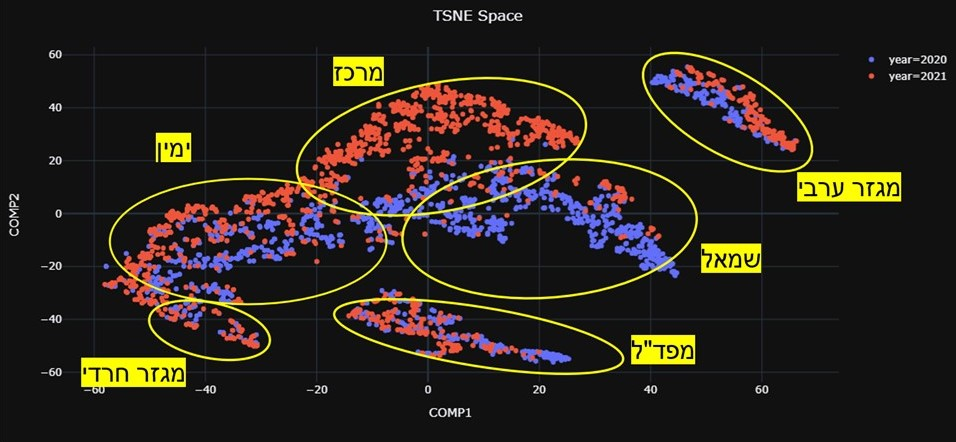

In [24]:
heads, tails = create_arrows_points(X_tsne)

show_space2(X_tsne, name_features=df_union.index, heads=heads, tails=tails, title="TSNE Space")